In [3]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import resnet50
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow.keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')

### Edgar Rubén Rojas Ovando 21000567

# Product Development - Modelo

## Predicción de malaria en imágenes, infectados y no infectados

### Data set: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

In [12]:
#Carga de los datos


def data_prep(parasitized,uninfected):

    parasitized= ["malaria/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["malaria/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('malaria/cell_images/Parasitized/'), os.listdir('malaria/cell_images/Uninfected/'))




In [13]:
#Mostramos los cuáles indican el path de la imagen y elresultado  (Si está infectado o no)
df.head()

,Image_Path,Labels
0,malaria/cell_images/Parasitized/C181P142ThinF_...,parasitized
1,malaria/cell_images/Parasitized/C82P43ThinF_IM...,parasitized
2,malaria/cell_images/Parasitized/C95P56ThinF_IM...,parasitized
3,malaria/cell_images/Parasitized/C59P20thinF_IM...,parasitized
4,malaria/cell_images/Parasitized/C68P29N_ThinF_...,parasitized


Mostrando 5 imágenes con Malaria(Infectadas): 



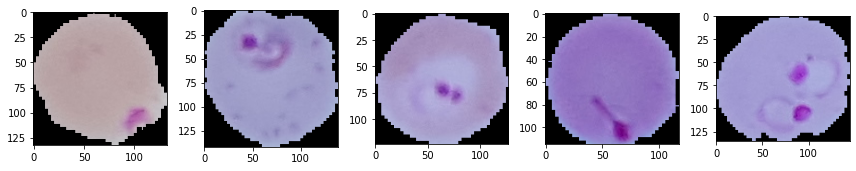


Mostrando 5 imágenes sin Malaria(No infectadas): 



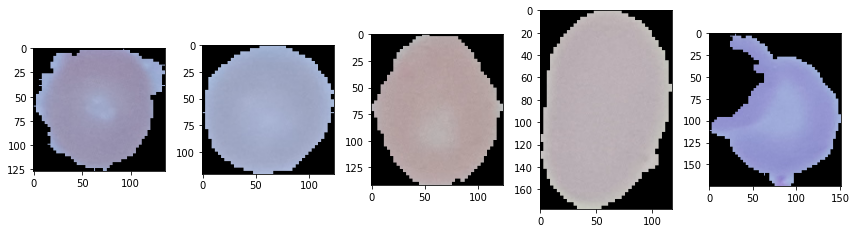

In [14]:
#Muestra aleatoria de datos

print("Mostrando 5 imágenes con Malaria(Infectadas): ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Mostrando 5 imágenes sin Malaria(No infectadas): ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Gráfica de Distribución de Las muestras')

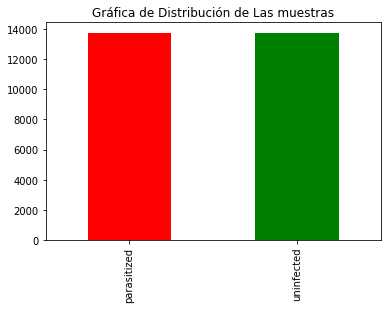

In [15]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Gráfica de Distribución de Las muestras')

In [25]:
#Creación de los datasets de entrenamiento y prueba     %70 / %30

train, test = train_test_split(df, test_size = .30)

#train = df.sample(frac=0.7,random_state=0)
#test = df.drop(df.index)

train

,Image_Path,Labels
11789,malaria/cell_images/Parasitized/C48P9thinF_IMG...,parasitized
22911,malaria/cell_images/Uninfected/C147P108ThinF_I...,uninfected
6475,malaria/cell_images/Parasitized/C68P29N_ThinF_...,parasitized
21085,malaria/cell_images/Uninfected/C59P20thinF_IMG...,uninfected
6296,malaria/cell_images/Parasitized/C99P60ThinF_IM...,parasitized
...,...,...
8432,malaria/cell_images/Parasitized/C81P42ThinF_IM...,parasitized
7091,malaria/cell_images/Parasitized/C184P145ThinF_...,parasitized
25360,malaria/cell_images/Uninfected/C123P84ThinF_IM...,uninfected
10772,malaria/cell_images/Parasitized/C116P77ThinF_I...,parasitized


In [26]:


img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [27]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()


Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 23s 221ms/step - loss: 1.4373 - accuracy: 0.5450 - val_loss: 0.6768 - val_accuracy: 0.5500
Epoch 2/4
100/100 [==============================] - 22s 217ms/step - loss: 0.5616 - accuracy: 0.7170 - val_loss: 0.4429 - val_accuracy: 0.8190
Epoch 3/4
100/100 [==============================] - 22s 216ms/step - loss: 0.4214 - accuracy: 0.8044 - val_loss: 0.3733 - val_accuracy: 0.8240
Epoch 4/4
100/100 [==============================] - 21s 213ms/step - loss: 0.3821 - accuracy: 0.8600 - val_loss: 0.2747 - val_accuracy: 0.9300


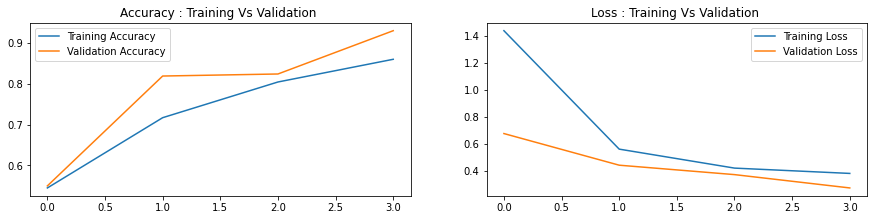

In [32]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 4 ,
                   validation_data = x_test,
                   validation_steps = 100, callbacks=my_callbacks)
    
    return model_history

    
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))

## El modelo obtuvo un 93% de precisión al evaluar las imágenes del dataset de prueba.